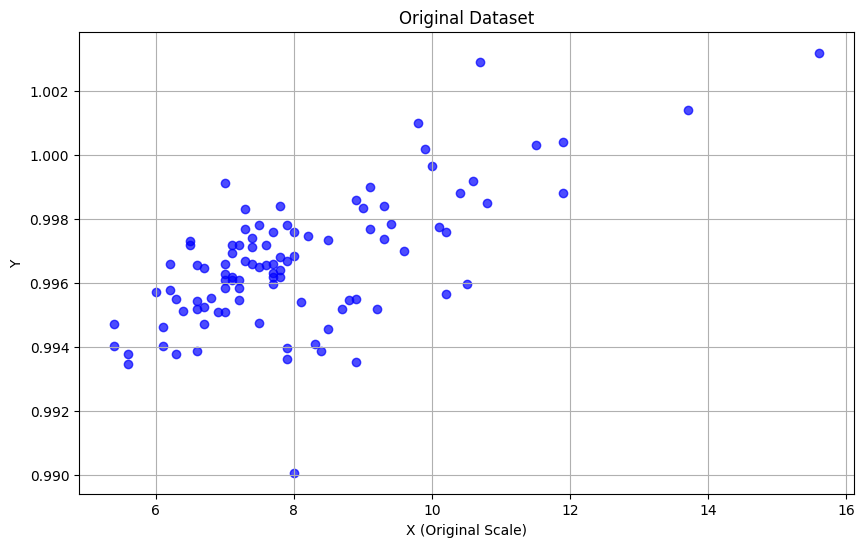

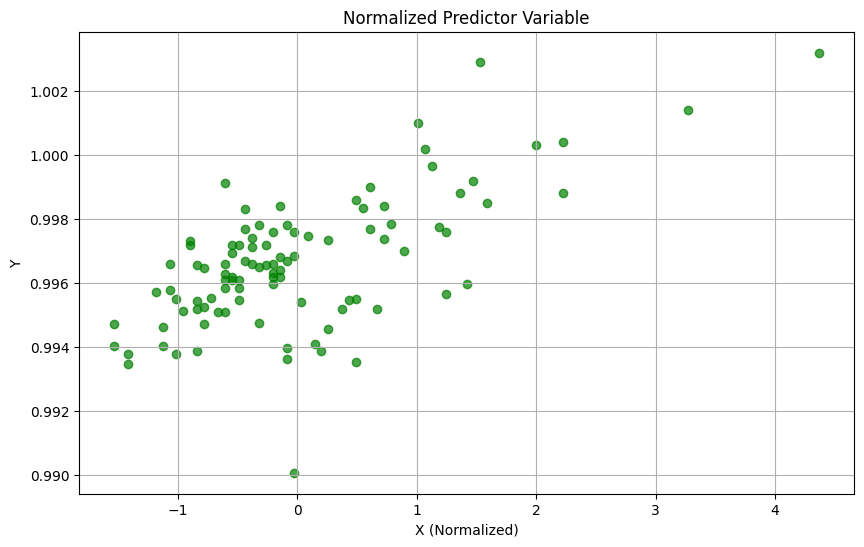

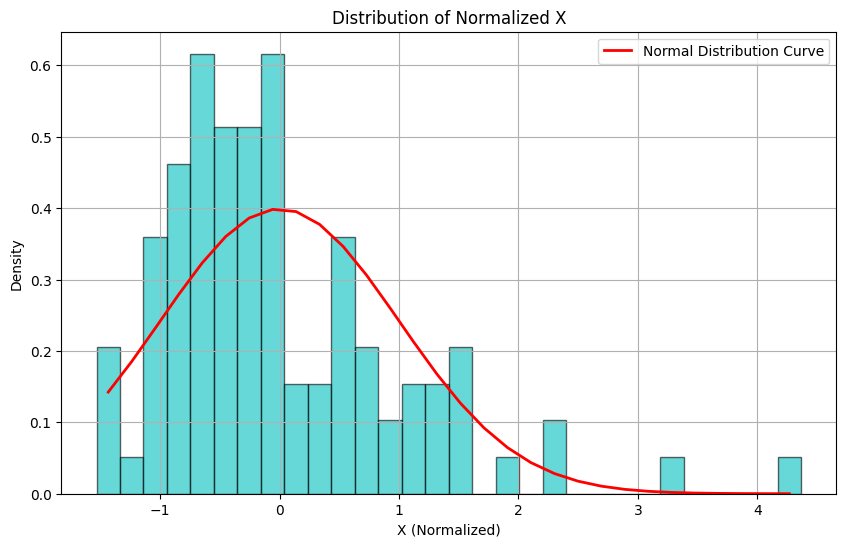

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize X and y to None
X = None
y = None

# Load data with proper error handling
try:
    # Load data from local files
    X = pd.read_csv('linearX.csv').values.flatten()
    y = pd.read_csv('linearY.csv').values.flatten()

except FileNotFoundError:
    print("Error: Please download these files and place in your working directory.")
    # X and y remain None

# 1. Plot original data (only if X and y were successfully loaded)
if X is not None and y is not None:
    plt.figure(figsize=(10,6))
    plt.scatter(X, y, c='blue', alpha=0.7)
    plt.title('Original Dataset')
    plt.xlabel('X (Original Scale)')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

    # 2. Data Normalization
    def z_score_normalize(data):
        mean = np.mean(data)
        std = np.std(data)
        normalized = (data - mean) / std
        return normalized, mean, std

    X_norm, X_mean, X_std = z_score_normalize(X)

    # Plot normalized data
    plt.figure(figsize=(10,6))
    plt.scatter(X_norm, y, c='green', alpha=0.7)
    plt.title('Normalized Predictor Variable')
    plt.xlabel('X (Normalized)')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

    # 3. Plot Histogram with Normal Distribution Curve
    plt.figure(figsize=(10,6))

    # Plot histogram
    counts, bins, _ = plt.hist(X_norm, bins=30, density=True, alpha=0.6, color='c', edgecolor='black')

    # Plot normal distribution curve
    bin_centers = (bins[:-1] + bins[1:]) / 2
    pdf = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * bin_centers**2)
    plt.plot(bin_centers, pdf, 'r-', linewidth=2, label='Normal Distribution Curve')

    plt.title('Distribution of Normalized X')
    plt.xlabel('X (Normalized)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Data files not found. Skipping plots.")

In [3]:
# Add Bias Term for Linear Regression
X_augmented = np.vstack([np.ones(len(X_norm)), X_norm]).T

# Batch Gradient Descent Implementation
def batch_gradient_descent(X, y, lr=0.5, max_iter=1000, tol=1e-5):
    theta = np.zeros(X.shape[1])  # Initialize θ0 and θ1
    cost_history = []

    for i in range(max_iter):
        y_pred = X @ theta  # Predicted values
        error = y_pred - y  # Compute error

        # Instead of calling compute_cost, calculate cost directly:
        cost = np.mean(error**2) / 2  # Compute Cost Function (MSE/2)

        cost_history.append(cost)

        # Convergence Check
        if i > 0 and abs(cost_history[-1] - cost_history[-2]) < tol:
            break

        grad = X.T @ error / len(X)  # Compute Gradient
        theta -= lr * grad  # Update Parameters

    return theta, cost_history, i+1  # Return θ, cost history, and iterations

# Train the Model
theta_final, cost_hist, n_iters = batch_gradient_descent(X_augmented, y, lr=0.5)

# Print Results
print("1. Results:")
print(f"Final parameters: θ0 = {theta_final[0]:.4f}, θ1 = {theta_final[1]:.4f}")
print(f"Final cost function value: {cost_hist[-1]:.6f}")
print(f"Converged after {n_iters} iterations (Criteria: Δcost < 1e-5)")

1. Results:
Final parameters: θ0 = 0.9947, θ1 = 0.0014
Final cost function value: 0.000003
Converged after 10 iterations (Criteria: Δcost < 1e-5)


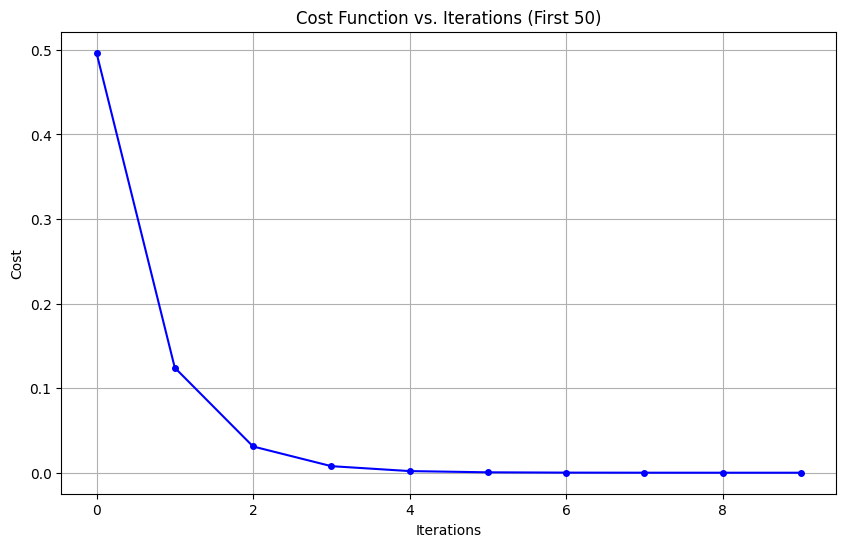

In [4]:
plt.figure(figsize=(10,6))
plt.plot(range(len(cost_hist)), cost_hist, 'b-o', markersize=4)  # Match available iterations
plt.title('Cost Function vs. Iterations (First 50)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


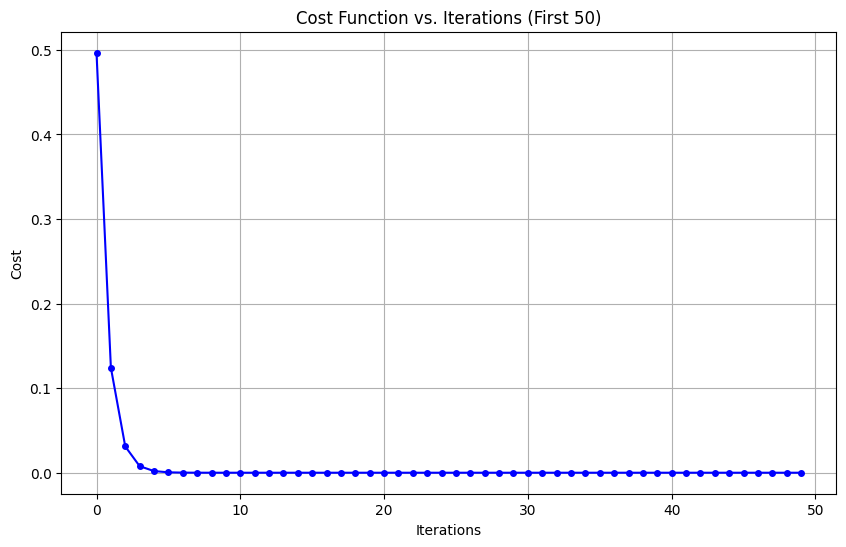

In [5]:
# Ensure cost_hist has at least 50 values by padding with the last cost value
cost_hist_extended = cost_hist + [cost_hist[-1]] * (50 - len(cost_hist)) if len(cost_hist) < 50 else cost_hist[:50]

plt.figure(figsize=(10,6))
plt.plot(range(50), cost_hist_extended, 'b-o', markersize=4)
plt.title('Cost Function vs. Iterations (First 50)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


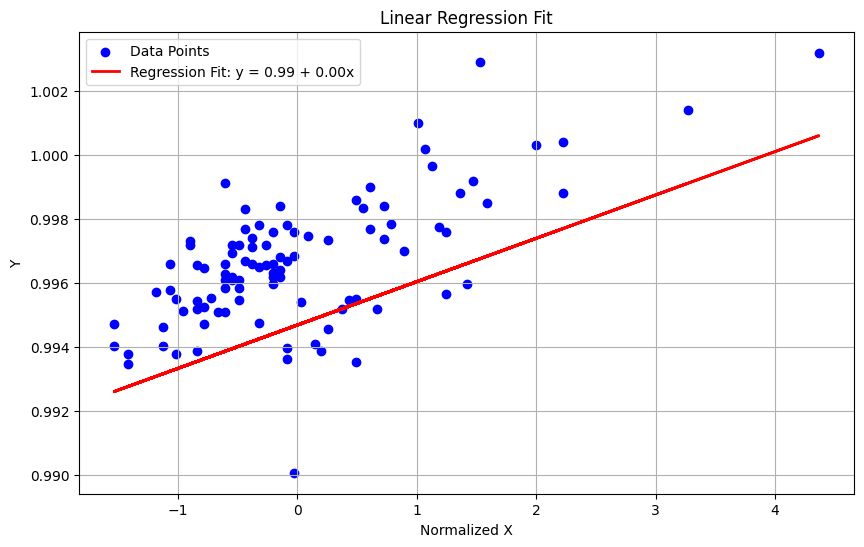

In [6]:
# 4. Plot Regression Fit Over the Data
plt.figure(figsize=(10,6))
plt.scatter(X_norm, y, c='blue', label='Data Points')
plt.plot(X_norm, X_augmented @ theta_final, 'r-', linewidth=2,
         label=f'Regression Fit: y = {theta_final[0]:.2f} + {theta_final[1]:.2f}x')
plt.title('Linear Regression Fit')
plt.xlabel('Normalized X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-12-b40d38d8e22b>:14: RuntimeWarning: overflow encountered in square
  cost = np.mean(error**2) / 2  # Compute Cost Function (MSE/2)
<ipython-input-12-b40d38d8e22b>:18: RuntimeWarning: invalid value encountered in scalar subtract
  if i > 0 and abs(cost_history[-1] - cost_history[-2]) < tol:
<ipython-input-12-b40d38d8e22b>:21: RuntimeWarning: overflow encountered in matmul
  grad = X.T @ error / len(X)  # Compute Gradient
<ipython-input-12-b40d38d8e22b>:21: RuntimeWarning: invalid value encountered in matmul
  grad = X.T @ error / len(X)  # Compute Gradient
<ipython-input-12-b40d38d8e22b>:22: RuntimeWarning: invalid value encountered in subtract
  theta -= lr * grad  # Update Parameters


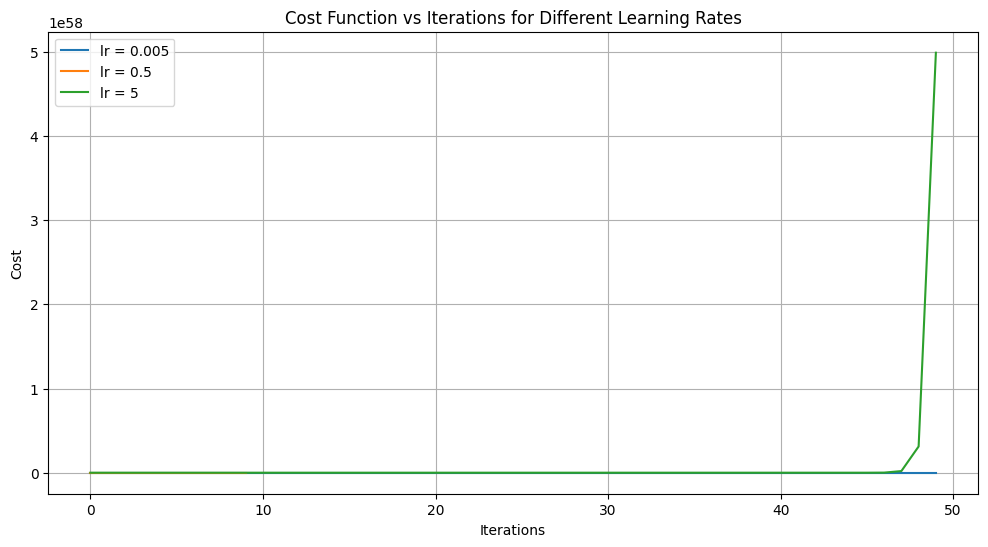

In [12]:
import numpy as np
import matplotlib.pyplot as plt
X_norm, X_mean, X_std = z_score_normalize(X)  # Corrected function call
X_augmented = np.vstack([np.ones(len(X_norm)), X_norm]).T
# Batch Gradient Descent Implementation
def batch_gradient_descent(X, y, lr=0.5, max_iter=1000, tol=1e-5):
    theta = np.zeros(X.shape[1])  # Initialize θ0 and θ1
    cost_history = []

    for i in range(max_iter):
        y_pred = X @ theta  # Predicted values
        error = y_pred - y  # Compute error

        cost = np.mean(error**2) / 2  # Compute Cost Function (MSE/2)
        cost_history.append(cost)

        # Convergence Check
        if i > 0 and abs(cost_history[-1] - cost_history[-2]) < tol:
            break

        grad = X.T @ error / len(X)  # Compute Gradient
        theta -= lr * grad  # Update Parameters

    return theta, cost_history, i+1  # Return θ, cost history, and iterations

# Test Different Learning Rates
learning_rates = [0.005, 0.5, 5]
cost_histories = {}

plt.figure(figsize=(12,6))
for lr in learning_rates:
    theta_lr, cost_hist_lr, _ = batch_gradient_descent(X_augmented, y, lr=lr)
    cost_histories[lr] = cost_hist_lr[:50]  # Store first 50 iterations

    plt.plot(range(len(cost_histories[lr])), cost_histories[lr], label=f'lr = {lr}')

plt.title('Cost Function vs Iterations for Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()



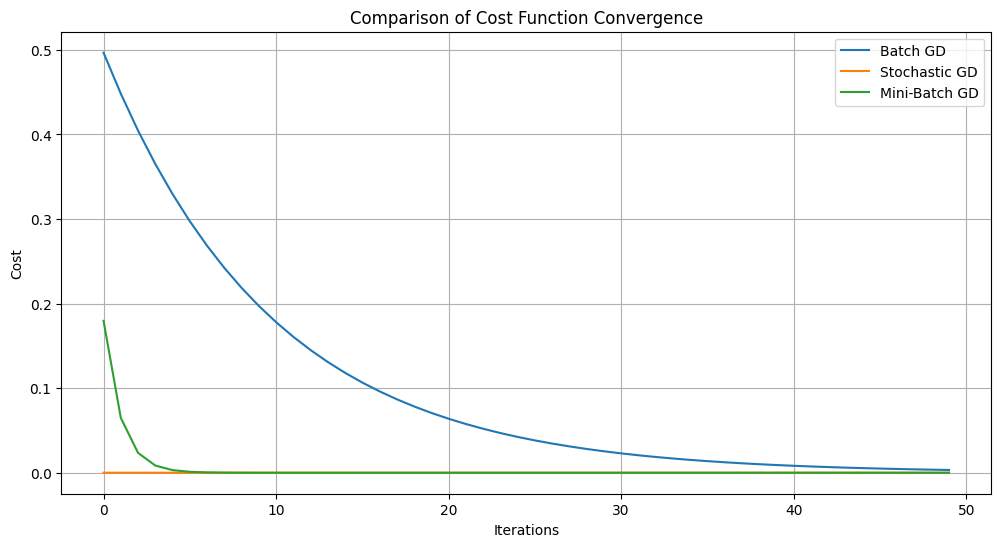

In [11]:

# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, y, lr=0.05, max_iter=50):
    theta = np.zeros(X.shape[1])
    cost_history = []

    for i in range(max_iter):
        for j in range(len(y)):  # Update for each data point
            rand_index = np.random.randint(0, len(y))
            xi = X[rand_index, :].reshape(1, -1)
            yi = y[rand_index]

            gradient = xi.T @ ((xi @ theta) - yi)
            theta -= lr * gradient.flatten()

        # Compute cost per epoch
        cost = np.mean((X @ theta - y) ** 2) / 2
        cost_history.append(cost)

    return theta, cost_history

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, lr=0.05, max_iter=50, batch_size=10):
    theta = np.zeros(X.shape[1])
    cost_history = []

    for i in range(max_iter):
        indices = np.random.permutation(len(y))
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for j in range(0, len(y), batch_size):
            X_batch = X_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]

            gradient = (X_batch.T @ ((X_batch @ theta) - y_batch)) / batch_size
            theta -= lr * gradient

        # Compute cost per epoch
        cost = np.mean((X @ theta - y) ** 2) / 2
        cost_history.append(cost)

    return theta, cost_history

# Run SGD and Mini-Batch GD
theta_sgd, cost_hist_sgd = stochastic_gradient_descent(X_augmented, y, lr=0.05, max_iter=50)
theta_mbgd, cost_hist_mbgd = mini_batch_gradient_descent(X_augmented, y, lr=0.05, max_iter=50)

# Run Batch Gradient Descent again to store cost history
theta_batch, cost_hist_batch, _ = batch_gradient_descent(X_augmented, y, lr=0.05, max_iter=50)

# Plot cost comparison
plt.figure(figsize=(12,6))
plt.plot(range(50), cost_hist_batch[:50], label='Batch GD', linestyle='-')
plt.plot(range(50), cost_hist_sgd, label='Stochastic GD', linestyle='-')
plt.plot(range(50), cost_hist_mbgd, label='Mini-Batch GD', linestyle='-')
plt.title('Comparison of Cost Function Convergence')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()